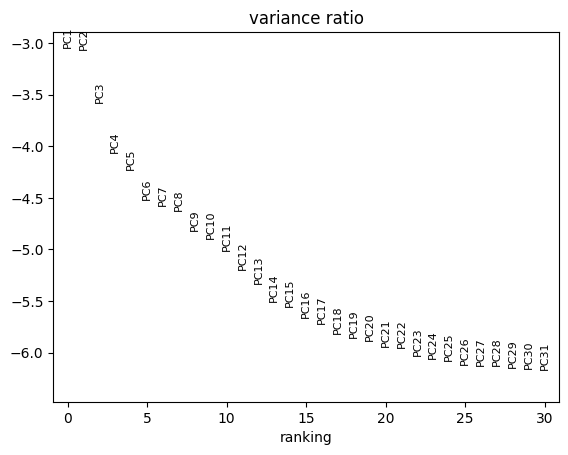

In [ ]:
import scanpy as sc
adata = sc.read("/mnt/c/Users/sneha/BrainCellAtlas/data/human_mtg_brain_atlas_final.h5ad")
sc.tl.pca(adata,svd_solver='arpack') #principal component analysis with hvg data which is normalized and log transformed
#arpack is the mathematical algorithm used to compute the principal components efficiently, especially for large datasets.
sc.pl.pca_variance_ratio(adata,log=True)

/tmp/ipykernel_151717/505079145.py:6: FutureWarning: The `igraph` implementation of leiden clustering is *orders of magnitude faster*. Set the flavor argument to (and install if needed) 'igraph' to use it.
In the future, the default backend for leiden will be igraph instead of leidenalg. To achieve the future defaults please pass: `flavor='igraph'` and `n_iterations=2`. `directed` must also be `False` to work with igraph’s implementation.
  sc.tl.leiden(adata,resolution=0.8)


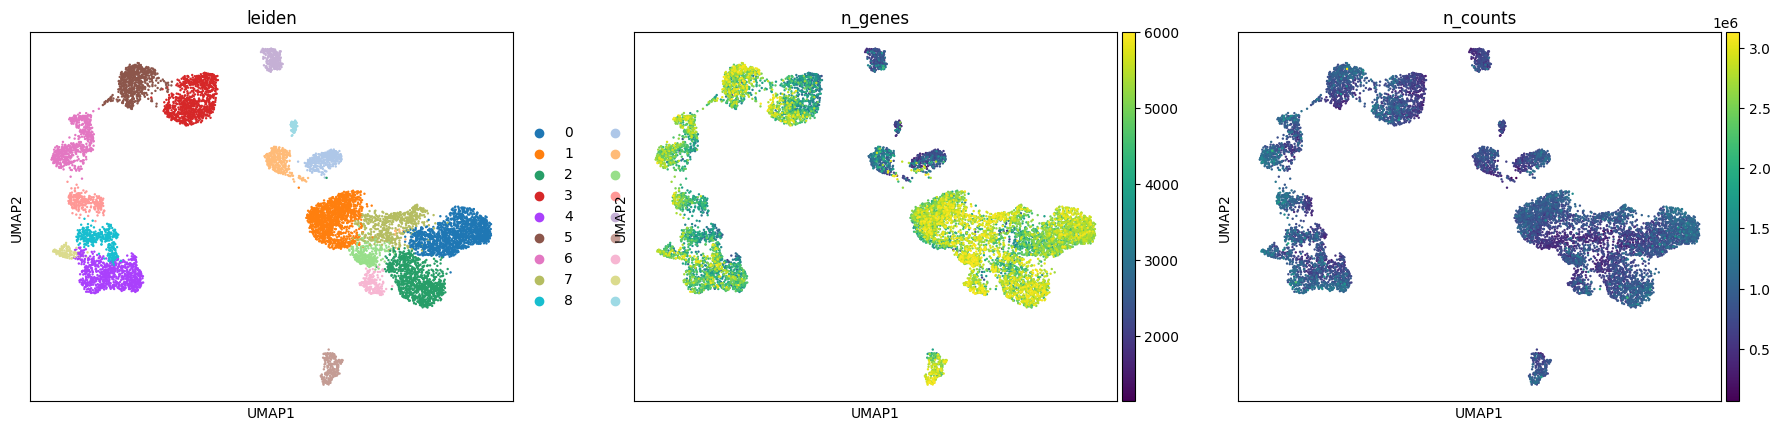

In [6]:
import igraph
import leidenalg

sc.pp.neighbors(adata, n_neighbors=15,n_pcs=25)
sc.tl.umap(adata)
sc.tl.leiden(adata,resolution=0.8)
sc.pl.umap(adata,color=['leiden', 'n_genes', 'n_counts'])

In [7]:
import scanpy as sc
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon', n_genes=20)
print("finding marker genes for each cluster")

finding marker genes for each cluster


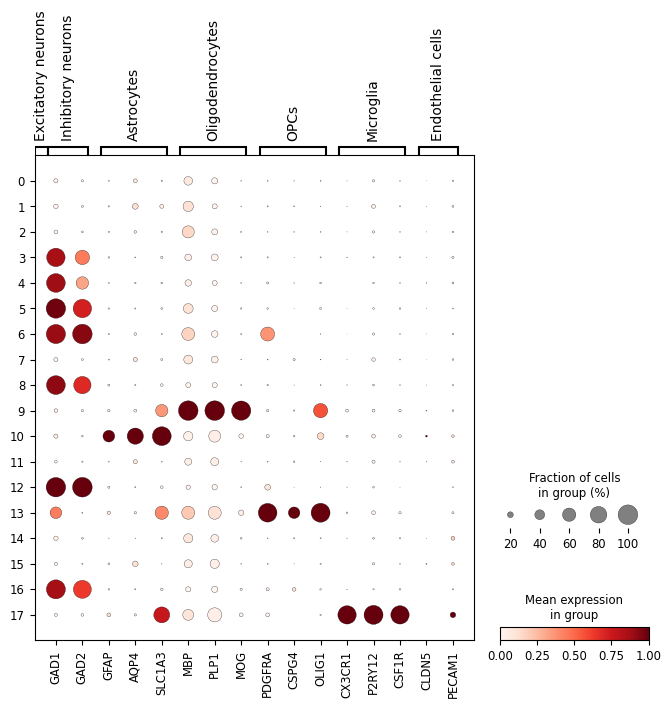

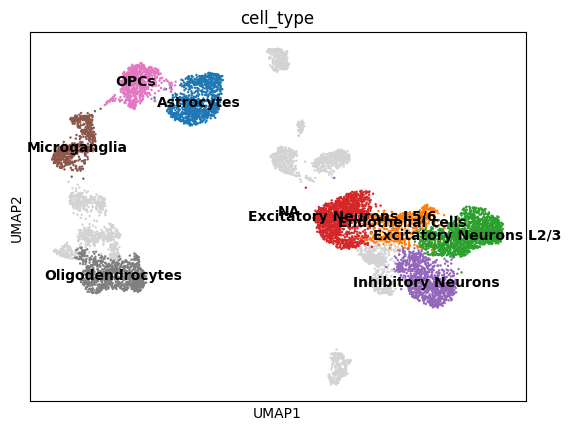

In [9]:
# Canonical brain cell type marker genes
markers = {
    'Excitatory neurons': [
       
    ],

    'Inhibitory neurons': [
        'GAD1',
        'GAD2',
    ],

    'Astrocytes': [
        'GFAP',
        'AQP4',
        'SLC1A3'   # EAAT1
    ],

    'Oligodendrocytes': [
        'MBP',
        'PLP1',
        'MOG'
    ],

    'OPCs': [
        'PDGFRA',
        'CSPG4',   # NG2
        'OLIG1'
    ],

    'Microglia': [
        'CX3CR1',
        'P2RY12',
        'CSF1R'
    ],

    'Endothelial cells': [
        'CLDN5',
        'PECAM1'
    ]
}
sc.pl.dotplot(adata, markers,  groupby='leiden',  use_raw=True,standard_scale='var')

#manual annotation
cluster_annotations={
    '0':'Excitatory Neurons L2/3',
    '1':'Excitatory Neurons L5/6',
    '2':'Inhibitory Neurons',
    '3':'Astrocytes',
    '4':'Oligodendrocytes',
    '5':'OPCs',
    '6':'Microganglia',
    '7':'Endothelial cells',
}
adata.obs['cell_type']=adata.obs['leiden'].map(cluster_annotations)
sc.pl.umap(adata,color='cell_type', legend_loc='on data')
# At the END of your clustering notebook, add:
adata.write('/mnt/c/Users/sneha/BrainCellAtlas/data/human_mtg_brain_atlas_processed.h5ad')